##### Reference : https://www.kaggle.com/code/rafetcan/plotly-tutorial-for-beginners

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter
from sklearn.model_selection import train_test_split

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
# Check happiness ranking of the top 30 countries with 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
world_happiness_report_2015 = pd.read_csv("./data/2015.csv")
world_happiness_report_2016 = pd.read_csv("./data/2016.csv")
world_happiness_report_2017 = pd.read_csv("./data/2017.csv")
world_happiness_report_2018 = pd.read_csv("./data/2018.csv")
world_happiness_report_2019 = pd.read_csv("./data/2019.csv")
world_happiness_report_2020 = pd.read_csv("./data/2020.csv")
world_happiness_report_2021 = pd.read_csv("./data/2021.csv")
world_happiness_report_2022 = pd.read_csv("./data/2022.csv", thousands=',')

In [42]:
# Preprocessing happiness score in 2022
Ladderscore = []

for i in world_happiness_report_2022['Happiness score']:
        Ladderscore.append(i/1000.0)

world_happiness_report_2022.insert(12, 'Ladder score', Ladderscore)

world_happiness_report_2022.drop(['Happiness score'], axis=1, inplace=True)

In [43]:
### Happiness ranking of the top 30 countries with 2015,2016,2017,2018,2019,2020 years.

# No world rankings in 2020.So we add it ourselves with this simple method
world_happiness_report_2020["Overall rank"] = (world_happiness_report_2020.index + 1) # Happiness Rank (we make it start from 1)
world_happiness_report_2021["Overall rank"] = (world_happiness_report_2021.index + 1) # Happiness Rank (we make it start from 1)

# we take the first thirty countries
df2015 = world_happiness_report_2015.iloc[:30,:] 
df2016 = world_happiness_report_2016.iloc[:30,:]
df2017 = world_happiness_report_2017.iloc[:30,:]
df2018 = world_happiness_report_2018.iloc[:30,:]
df2019 = world_happiness_report_2019.iloc[:30,:]
df2020 = world_happiness_report_2020.iloc[:30,:]
df2021 = world_happiness_report_2021.iloc[:30,:]
df2022 = world_happiness_report_2022.iloc[:30,:]

# creating trace1(year 2015)
trace1 =go.Scatter(
                    x = df2015["Happiness Rank"], # world ranking
                    y = df2015["Happiness Score"],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(100, 20, 120, 0.5)'),
                    text= df2015["Country"])
# creating trace2(year 2016)
trace2 =go.Scatter(
                    x = df2016["Happiness Rank"], # world ranking
                    y = df2016["Happiness Score"],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 99, 20, 0.6)'),
                    text= df2016["Country"])
# creating trace3(year 2017)
trace3 =go.Scatter(
                    x = df2017["Happiness.Rank"], # world ranking
                    y = df2017["Happiness.Score"],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(0, 0, 200, 0.7)'),
                    text= df2017["Country"])
# creating trace4(year 2018)
trace4 =go.Scatter(
                    x = df2018["Overall rank"], # world ranking
                    y = df2018["Score"],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'rgba(255, 0, 255, 0.8)'),
                    text= df2018["Country or region"])
# creating trace5(year 2019)
trace5 =go.Scatter(
                    x = df2019["Overall rank"], # world ranking
                    y = df2019["Score"],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'rgba(255, 128, 2, 0.9)'),
                    text= df2019["Country or region"])
# creating trace6(year 2020)
trace6 =go.Scatter(
                    x = df2020["Overall rank"], # world ranking
                    y = df2020["Ladder score"],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = 'rgba(255, 0, 2, 1)'),
                    text= df2020["Country name"])
# creating trace7(year 2021)
trace7 =go.Scatter(
                    x = df2021["Overall rank"], # world ranking
                    y = df2021["Ladder score"],
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = 'aqua'),
                    text= df2021["Country name"])
# creating trace6(year 2022)
trace8 =go.Scatter(
                    x = df2022["RANK"], # world ranking
                    y = df2022["Ladder score"],
                    mode = "markers",
                    name = "2022",
                    marker = dict(color = 'rosybrown'),
                    text= df2022["Country"])

# We combine traces
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]

layout = dict(title = 'Happiness ranking of the top 30 countries with 2015,2016,2017,2018,2019,2020,2021,2022 years',
              xaxis= dict(title= 'Happiness Ranking',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False))

# We combine our data and layout
# create figure
              
fig = dict(data = data, layout = layout)
iplot(fig)

In [44]:
# Happiness by years
### we get years of happiness
sum_happiness_rate_2022 = sum(world_happiness_report_2020["Ladder score"].head(145))
sum_happiness_rate_2021 = sum(world_happiness_report_2020["Ladder score"].head(145))
sum_happiness_rate_2020 = sum(world_happiness_report_2020["Ladder score"].head(145))
sum_happiness_rate_2019 = sum(world_happiness_report_2019["Score"].head(145))
sum_happiness_rate_2018 = sum(world_happiness_report_2018["Score"].head(145))
sum_happiness_rate_2017 = sum(world_happiness_report_2017["Happiness.Score"].head(145))
sum_happiness_rate_2016 = sum(world_happiness_report_2016["Happiness Score"].head(145))
sum_happiness_rate_2015 = sum(world_happiness_report_2015["Happiness Score"].head(145))


#years
years = ["2022","2021","2020","2019","2018","2017","2016","2015"]
#We put our rate on a list
years_happiness_rate = [sum_happiness_rate_2022, sum_happiness_rate_2021, sum_happiness_rate_2020,sum_happiness_rate_2019,sum_happiness_rate_2018,
        sum_happiness_rate_2017,sum_happiness_rate_2016,sum_happiness_rate_2015]
# creat trace
trace =go.Pie(                   
    values=years_happiness_rate,
    labels=years, # years names on the side
    domain={"x":[0,.8]},
    marker = dict(line=dict(color='black',width=2.5)), # lines around the pie chart
    name= "Happiness Rate",
    insidetextorientation="radial", # articles according to the shape of the chart
    pull=[0.3, 0, 0, 0.2,0]) #  We indicate the places I want to separate from our pie chart.

#create data
data = [trace]
#create layout
layout = dict(title = 'Happiest Year', width=750, height=500)

fig = dict(data=data,layout=layout)
iplot(fig)

In [45]:
# EDA for 2021 data
dataframe = pd.read_csv('./data/2021.csv')

df_data, df_test = train_test_split(dataframe, shuffle=False, random_state=2022)

### Variable description

- Country name : The name of the countries
- Regional indicator : The region which the country is in
- Ladder score : Ladder score of countries
- Standard error of ladder score : The error rate in the ladder score
- upperwhisker : Upper limit of score
- lowerwhisker : Lower limit of score
- Logged GDP per capita : Log scale GDP per capita
- Social support : Social support scores of countries
- Healthy life expectancy : Healthy life expectancy of countries
- Freedom to make life choices : The freedom of people in that country to choose life
- Generosity : Generosity rate of the country
- Perceptions of corruption : Corruption perceptions in the country
- Ladder score in Dystopia : Ladder score in Dystopia of the coutry
- Explained by: Log GDP per capita : Explained Log GDP per capita ratio
- Explained by: Social support : Explained social support rate
- Explained by: Healthy life expectancy : Explained Healthy life expectancy
- Explained by: Freedom to make life choices : Explained Freedom to make life choices
- Explained by: Generosity : Explained Generosity
- Explained by: Perceptions of corruption : Explained Perceptions of corruption
- Dystopia + residual : Dystopia + residual total rate

In [46]:
df_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [47]:
df_data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

- The dataframe don't have a NaN value

In [48]:
df_data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.00,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,5.995216,0.053667,6.100432,5.889937,9.846676,0.851928,67.449234,0.820387,-0.023910,0.711523,2.43,1.121955,0.877090,0.597541,0.533748,0.172333,0.145297,2.547279
std,0.778226,0.018307,0.765263,0.792610,0.937586,0.094353,5.369366,0.094884,0.144745,0.191410,0.00,0.327533,0.212595,0.169146,0.115450,0.094444,0.122131,0.453802
min,4.854000,0.027000,4.970000,4.738000,7.098000,0.489000,50.114000,0.480000,-0.288000,0.082000,2.43,0.162000,0.058000,0.052000,0.119000,0.000000,0.000000,1.236000
25%,5.340500,0.041000,5.457000,5.201500,9.315500,0.815000,65.079000,0.759000,-0.125000,0.649500,2.43,0.936000,0.793500,0.523000,0.459500,0.106000,0.060500,2.258000
50%,5.940000,0.049000,6.077000,5.821000,9.940000,0.877000,67.906000,0.837000,-0.053000,0.756000,2.43,1.155000,0.932000,0.612000,0.554000,0.153000,0.117000,2.585000
75%,6.472000,0.060000,6.575500,6.380000,10.617000,0.925500,72.099500,0.893500,0.075500,0.844500,2.43,1.391000,1.043000,0.744000,0.622500,0.237000,0.185000,2.806000
max,7.842000,0.156000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                111 non-null    object 
 1   Regional indicator                          111 non-null    object 
 2   Ladder score                                111 non-null    float64
 3   Standard error of ladder score              111 non-null    float64
 4   upperwhisker                                111 non-null    float64
 5   lowerwhisker                                111 non-null    float64
 6   Logged GDP per capita                       111 non-null    float64
 7   Social support                              111 non-null    float64
 8   Healthy life expectancy                     111 non-null    float64
 9   Freedom to make life choices                111 non-null    float64
 10  Generosity    

In [50]:
# Regional indicator

Regions = df_data['Regional indicator']
Regions_counts = Regions.value_counts()

In [51]:
Regions_counts

Western Europe                        21
Latin America and Caribbean           19
Central and Eastern Europe            17
Commonwealth of Independent States    12
Sub-Saharan Africa                    11
Middle East and North Africa          10
Southeast Asia                         7
East Asia                              6
North America and ANZ                  4
South Asia                             4
Name: Regional indicator, dtype: int64

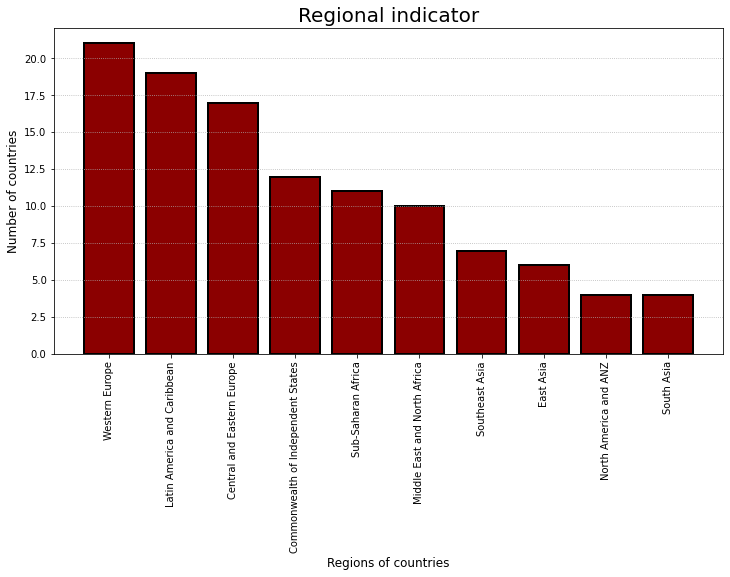

In [52]:
# Visualization
plt.figure(figsize=(12, 6))
plt.grid(axis='y', linestyle=':')
plt.bar(Regions_counts.index, Regions_counts.values, color = 'darkred', edgecolor = 'black', linewidth = 2)
plt.xticks(rotation='90', size=10)
plt.xlabel('Regions of countries', size=12)
plt.ylabel('Number of countries', size=12)
plt.title('Regional indicator', size=20)
plt.show()

In [53]:
rank = ['Western Europe', 'Latin America and Caribbean', 'Central and Eastern Europe', 'Commonwealth of Independent States', 'Sub-Saharan Africa', 'Middle East and North Africa', 'Southeast Asia',
        'East Asia', 'South Asia', 'North America and ANZ']

NumRegion = []

for i in df_data['Regional indicator']:
        for k in rank:
                if i == k:
                        NumRegion.append(rank.index(k))

df_data.insert(20, 'NumRegion', NumRegion)

# df_data.drop(['Regional indicator'], axis=1, inplace=True)
    

In [54]:
# Extract numerical feature for feature analysis
numerical_feats = df_data.dtypes[df_data.dtypes != 'object'].index
print('Number of numerical features: ', len(numerical_feats))

Number of numerical features:  19


In [55]:
# Function that plot a histogram of variable
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    # plt.hist(df_data[variable]) # histogram
    sns.histplot(df_data[variable], color='darkred', edgecolor='black', kde=True, bins=10)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist '.format(variable))
    plt.show()

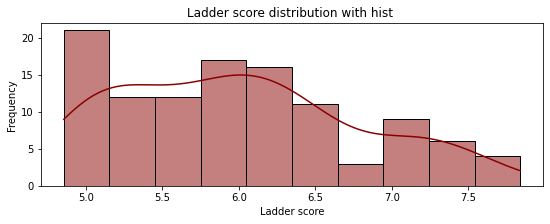

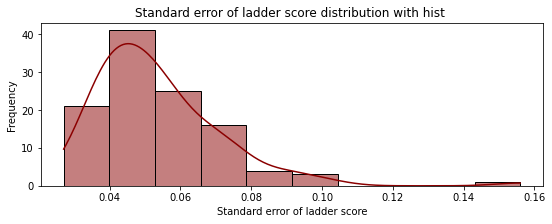

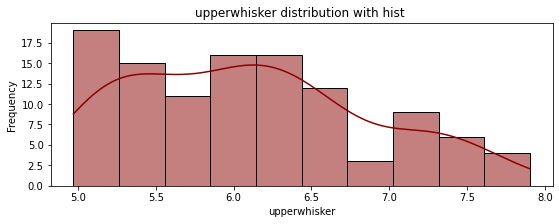

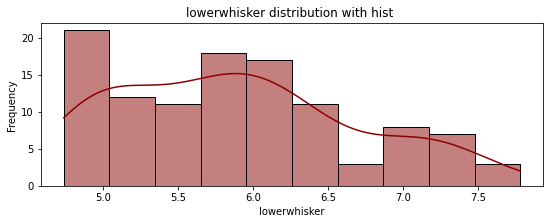

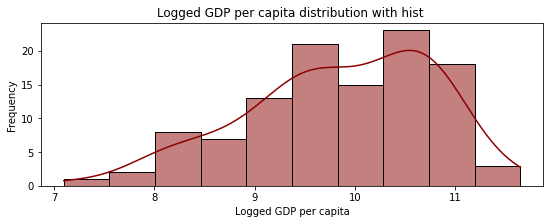

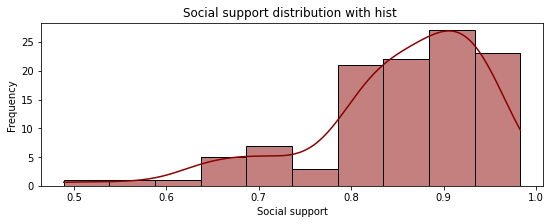

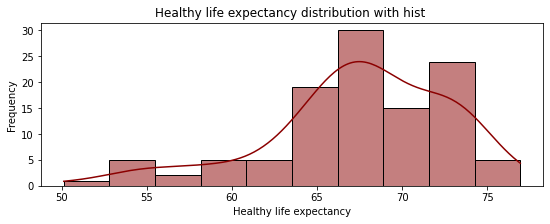

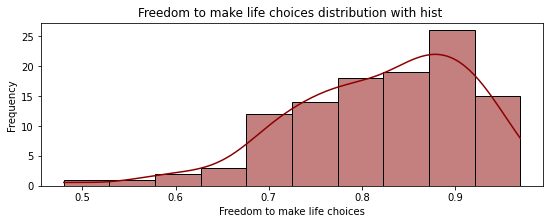

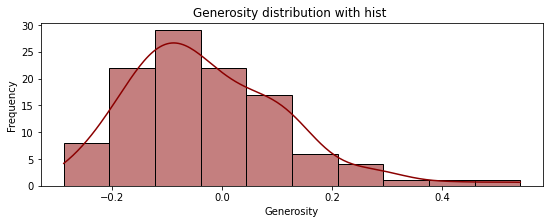

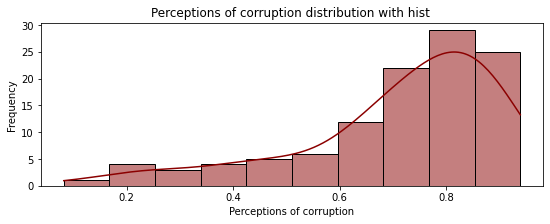

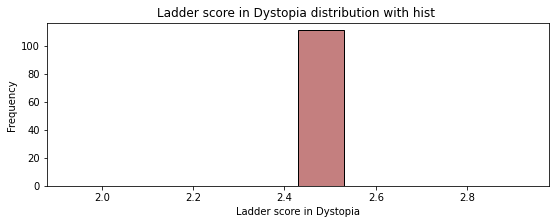

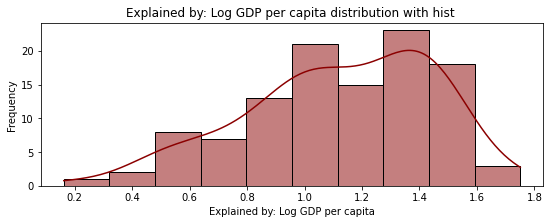

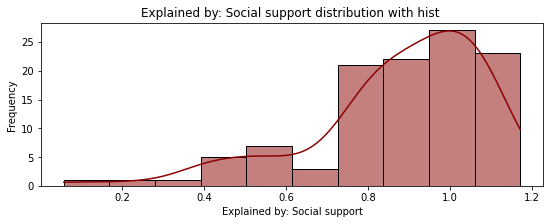

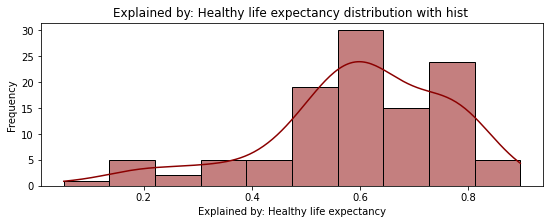

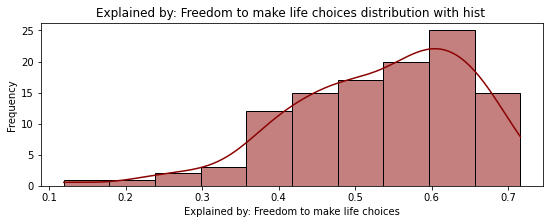

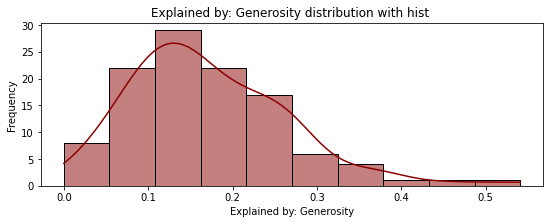

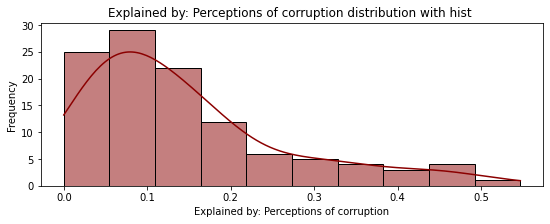

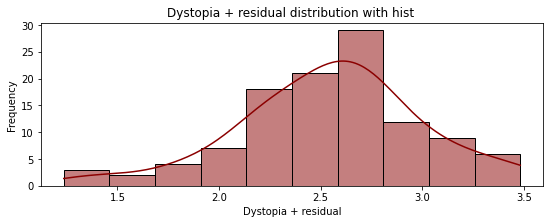

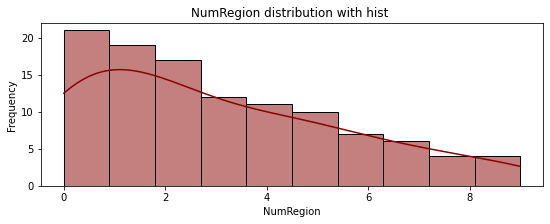

In [56]:
# Plot histogram of each variable
numericVar = list(numerical_feats)

for n in numericVar:
    plot_hist(n)

<AxesSubplot:>

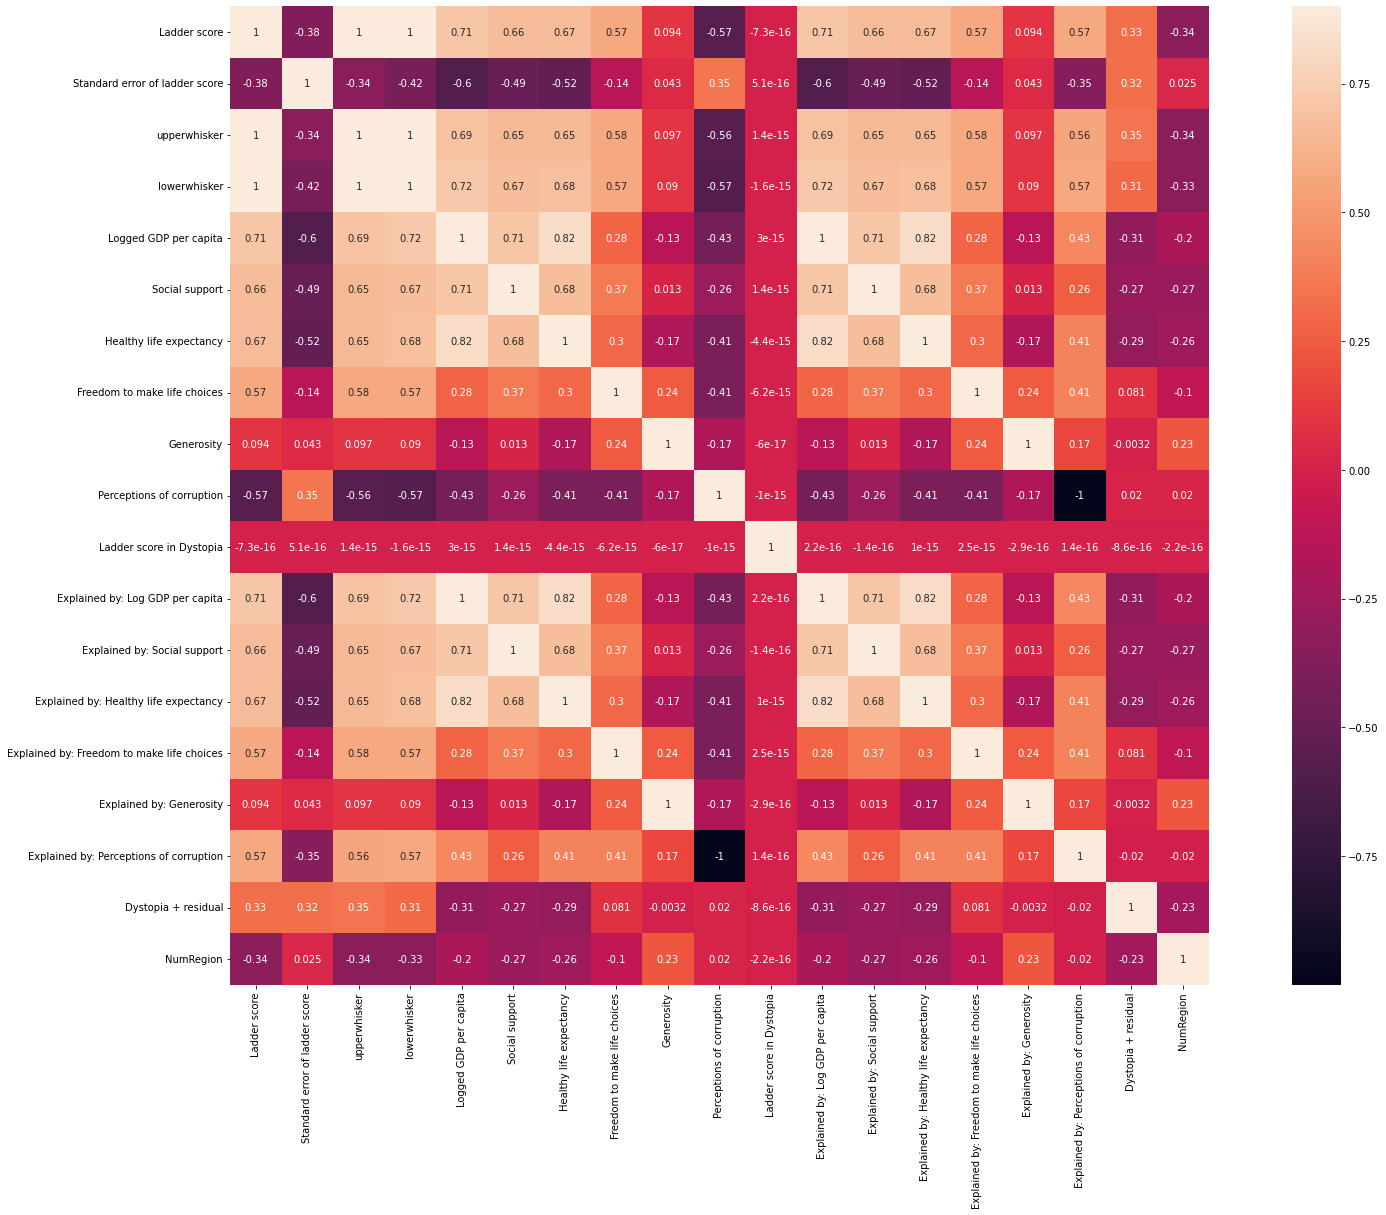

In [57]:
# Visualize a correlation of the features
corr = df_data.corr()
plt.subplots(figsize=(30,18))
sns.heatmap(corr, vmax=0.9, annot=True, cmap='rocket', square=True)

In [58]:
# Check the VIF of features
VIF_features = df_data[numerical_feats]

VIF = []

VIF_val = VIF_features.values

for i in range(len(VIF_features.columns)):
    VIF.append(variance_inflation_factor(VIF_val, i))
    
vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = VIF_features.columns
vif_dataframe['VIF'] = VIF
vif_dataframe

,columns,VIF
0,Ladder score,6.450810e+06
1,Standard error of ladder score,3.901463e+03
2,upperwhisker,1.792770e+06
3,lowerwhisker,2.655529e+06
4,Logged GDP per capita,1.392049e+06
5,Social support,9.861987e+04
6,Healthy life expectancy,5.239074e+05
7,Freedom to make life choices,7.220751e+04
8,Generosity,1.033497e+05
9,Perceptions of corruption,2.084223e+05


In [59]:
# drop explained features
df_data.drop(['upperwhisker', 'lowerwhisker', 'Standard error of ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 
              'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis=1, inplace=True)

# # drop score features
# df_data.drop(['upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 
#               'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [60]:
# Extract numerical feature for feature analysis
numerical_feats = df_data.dtypes[df_data.dtypes != 'object'].index
print('Number of numerical features: ', len(numerical_feats))

Number of numerical features:  9


In [61]:
# Check the VIF of features
VIF_features = df_data[numerical_feats]

VIF = []

VIF_val = VIF_features.values

for i in range(len(VIF_features.columns)):
    VIF.append(variance_inflation_factor(VIF_val, i))
    
vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = VIF_features.columns
vif_dataframe['VIF'] = VIF
vif_dataframe

,columns,VIF
0,Ladder score,3.955941
1,Logged GDP per capita,4.333348
2,Social support,2.598878
3,Healthy life expectancy,3.528281
4,Freedom to make life choices,1.673168
5,Generosity,1.309381
6,Perceptions of corruption,1.705931
7,Ladder score in Dystopia,383.058221
8,NumRegion,1.314823


In [62]:
# Outlier detection with IQR
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    """
    ## Usually at least 2 outliers in a row we drop.
    ## if there are two discrete values
    """
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [63]:
# Find outlier row
df_data.loc[detect_outliers(df_data,['Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'])]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,NumRegion
95,Niger,Sub-Saharan Africa,5.074,7.098,0.641,53.78,0.806,0.018,0.693,2.43,4


In [64]:
# Drp outlier
df_data.drop(detect_outliers(df_data,['Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']), axis=0, inplace=True)

In [65]:
# Happiness rate for each region
# We put our singular regions on a list
regions =list(df_data["Regional indicator"].unique()) 
# happiness rates of regions
regions_happiness_rate = []

for i in regions:
    x = df_data[df_data["Regional indicator"] == i]
    happiness_rate = sum(x["Ladder score"]) / len(x)
    regions_happiness_rate.append(happiness_rate) # add list

# figure
fig = {
  "data": [
    {
      "values": regions_happiness_rate,
      "labels": regions, # region names on the side
      "domain": {"x": [0, .8]}, # chart size
      "name": "Happiness Rate",
      "hoverinfo":"label+percent+name", # text on hover
      "hole": .3, # the size of the hole in the middle
      "type": "pie" # chart type
    },],
  "layout": {
        "title":"Happiness Rates by Region", # chart title
        'width' : 750,
        'height' : 500,
        "annotations": [ # regulation of chart
            { "font": { "size": 13},
              "showarrow": True, # show arrow on
              "text": "Happiness Rate", # arrow text
                "x": 0.2, # x-axis
                "y": 0.9 # y-axis
            },
        ]
    }
}
iplot(fig)

In [66]:
# 3D scatter plot with colorscaling for 2021
df_data["Overall rank"] = (df_data.index + 1) # Happiness Rank (we make it start from 1)

trace1 = go.Scatter3d(
    x=df_data["Country name"],
    y=df_data["Generosity"],
    z=df_data["Social support"],
    mode='markers',
    marker=dict(
        size=6,
        color= df_data["Overall rank"],  # set color to an array/list of desired values      
        
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    width=750,
    height=700
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [69]:
# We choose our top 50 countries
happy = df_data.head(50)

# information to be given when mouse over the country
hover_data = df_data[["Overall rank","Regional indicator","Ladder score","Logged GDP per capita","Social support","Generosity"]]

fig = px.choropleth(happy,
                    locations=happy["Country name"],
                    locationmode="country names",
                    projection="natural earth",
                    hover_data=hover_data,
                    hover_name=happy["Country name"],
                    color="Overall rank",
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    scope="world")

fig.update_layout(width=750, height=500)
fig.show()